<a href="https://colab.research.google.com/github/sawarn69/Multi-Layer-Perceptron-Architectures-on-MNIST-Dataset/blob/master/Keras_Mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 1.2829 - acc: 0.6961 - val_loss: 0.8123 - val_acc: 0.8334
Epoch 2/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.7186 - acc: 0.8408 - val_loss: 0.6072 - val_acc: 0.8619
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.5885 - acc: 0.8598 - val_loss: 0.5254 - val_acc: 0.8727
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.5263 - acc: 0.8690 - val_loss: 0.4795 - val_acc: 0.8818
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.4884 - acc: 0.8751 - val_loss: 0.4497 - val_acc: 0.8870
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.4623 - acc: 0.8801 - val_loss: 0.4285 - val_acc: 0.8895
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0

Test score: 0.33542889214754107
Test accuracy: 0.9086


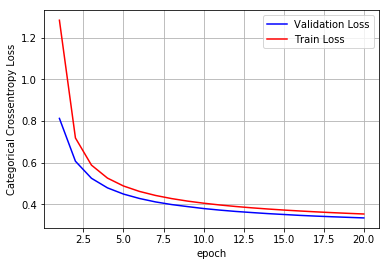

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [16]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 2.2638 - acc: 0.2345 - val_loss: 2.2181 - val_acc: 0.4461
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 2.1731 - acc: 0.4669 - val_loss: 2.1160 - val_acc: 0.5124
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 2.0541 - acc: 0.5671 - val_loss: 1.9716 - val_acc: 0.6737
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 1.8862 - acc: 0.6471 - val_loss: 1.7736 - val_acc: 0.6699
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 1.6713 - acc: 0.6960 - val_loss: 1.5412 - val_acc: 0.7302
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 1.4404 - acc: 0.7362 - val_loss: 1.3136 - val_acc: 0.7598
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 1.2307 - acc: 0.7703 - val_loss: 1.1214 - val_acc

Test score: 0.45117625663280486
Test accuracy: 0.8809


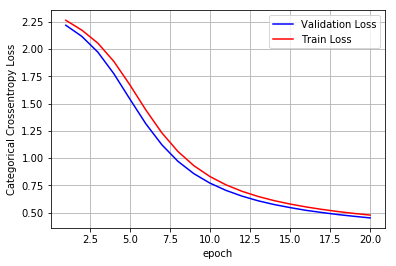

In [18]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

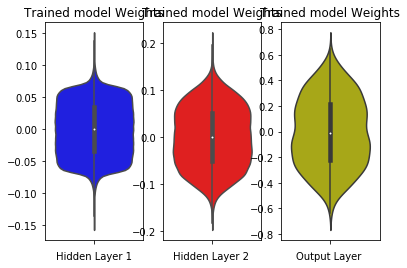

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.5502 - acc: 0.8588 - val_loss: 0.2573 - val_acc: 0.9234
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2229 - acc: 0.9345 - val_loss: 0.1908 - val_acc: 0.9414
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - los

Test score: 0.07778867438085071
Test accuracy: 0.9803


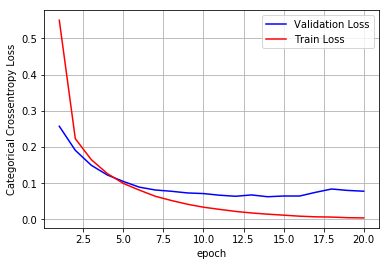

In [21]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

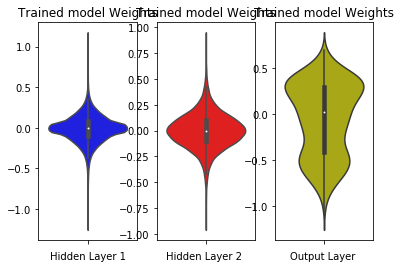

In [22]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [23]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.7503 - acc: 0.7919 - val_loss: 0.3938 - val_acc: 0.8888
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3555 - acc: 0.8992 - val_loss: 0.3042 - val_acc: 0.9133
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2927 - acc: 0.9164 - val_loss: 0.2627 - val_acc: 0.9262
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2581 - acc: 0.9266 - val_loss: 0.2372 - val_acc: 0.9342
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.2342 - acc: 0.9332 - val_loss: 0.2195 - val_acc: 0.9367
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2157 - acc: 0.9382 - val_loss: 0.2044 - val_acc: 0.9406
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2006 - acc: 0.9423 - val_loss: 0.1935 - val_acc

Test score: 0.12330506476014852
Test accuracy: 0.9633


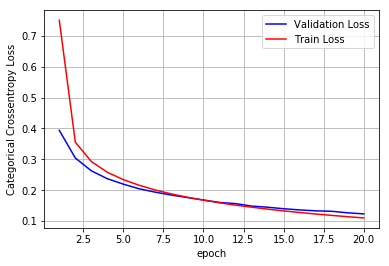

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

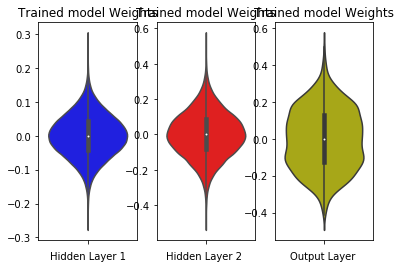

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2295 - acc: 0.9313 - val_loss: 0.1146 - val_acc: 0.9672
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0868 - acc: 0.9735 - val_loss: 0.0872 - val_acc: 0.9723
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step 

Test score: 0.10628241132400654
Test accuracy: 0.9802


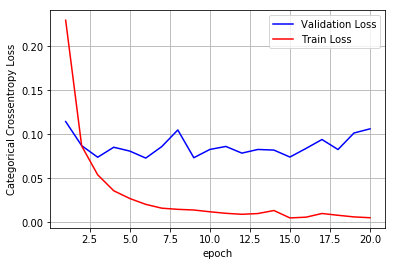

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

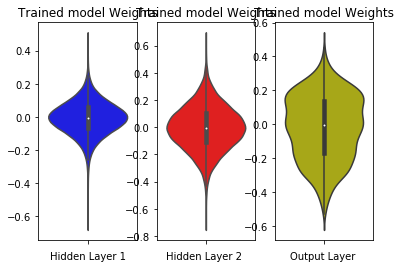

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [30]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [31]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3062 - acc: 0.9095 - val_loss: 0.2150 - val_acc: 0.9360
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.1760 - acc: 0.9490 - val_loss: 0.1816 - val_acc: 0.9486
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1397 - acc: 0.9590 - val_loss: 0.1410 - val_acc: 0.9586
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.1112 - acc: 0.9668 - val_loss: 0.1440 - val_acc: 0.9571
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0971 - acc: 0.9709 - val_loss: 0.1279 - val_acc: 0.9608
Epoch 6/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0818 - acc: 0.9749 - val_loss: 0.1187 - val_acc: 0.9627
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0709 - acc: 0.9775 - val_loss: 0.1111 - val_acc

Test score: 0.10798616036992462
Test accuracy: 0.9729


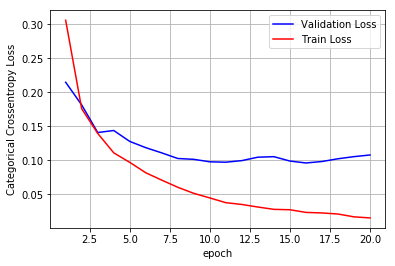

In [32]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

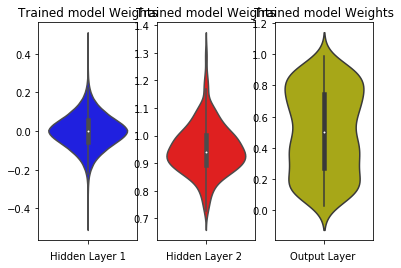

In [33]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [34]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [35]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.6706 - acc: 0.7928 - val_loss: 0.2826 - val_acc: 0.9173
Epoch 2/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.4279 - acc: 0.8693 - val_loss: 0.2585 - val_acc: 0.9260
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3807 - acc: 0.8836 - val_loss: 0.2370 - val_acc: 0.9286
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3550 - acc: 0.8930 - val_loss: 0.2181 - val_acc: 0.9338
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3324 - acc: 0.8996 - val_loss: 0.2135 - val_acc: 0.9368
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.3176 - acc: 0.9038 - val_loss: 0.2037 - val_acc: 0.9395
Epoch 7/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3057 - acc: 0.9081 - val_loss: 0.1987 - val_acc

Test score: 0.10377271350808441
Test accuracy: 0.9707


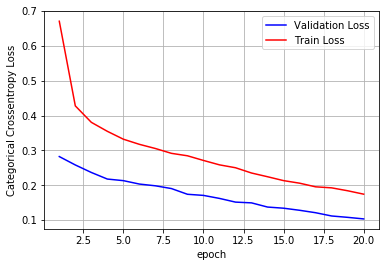

In [36]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

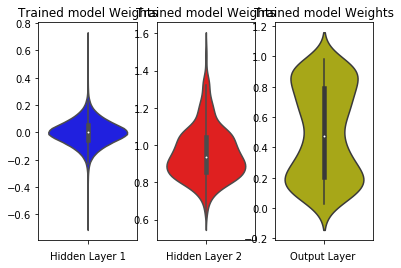

In [37]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [39]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [40]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976900 using {'activ': 'relu'}
0.975617 (0.001736) with: {'activ': 'sigmoid'}
0.976900 (0.002005) with: {'activ': 'relu'}


# # architectures for assignment- 1> 2 HR-  2> 3HR 3> 5 HR 
# epoch vs training and test loss for each model

### without dropout and BN

In [41]:
model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(120, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_42 (Dense)             (None, 120)               43800     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1210      
Total params: 330,750
Trainable params: 330,750
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2441 - acc: 0.9281 - val_loss: 0.1246 - val_acc: 0.9610
Epoch 2/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0911 - acc: 0.9726 - val_loss: 0.1043 - val_acc: 0.9665
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step 

In [42]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1719 - acc: 0.9491 - val_loss: 0.1020 - val_acc: 0.9701
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1655 - acc: 0.9508 - val_loss: 0.0987 - val_acc: 0.9706
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1549 - acc: 0.9535 - val_loss: 0.0949 - val_acc: 0.9713
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1558 - acc: 0.9533 - val_loss: 0.0934 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1441 - acc: 0.9569 - val_loss: 0.0904 - val_acc: 0.9733
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1419 - acc: 0.9575 - val_loss: 0.0884 - val_acc: 0.9731
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1370 - acc: 0.9588 - val_loss: 0.0852 - val_acc

Test score: 0.07039075202518143
Test accuracy: 0.9797


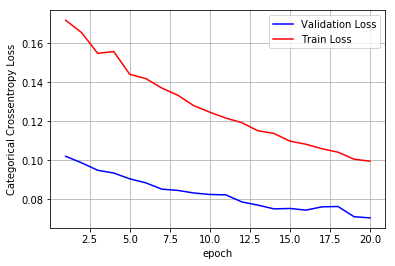

In [43]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

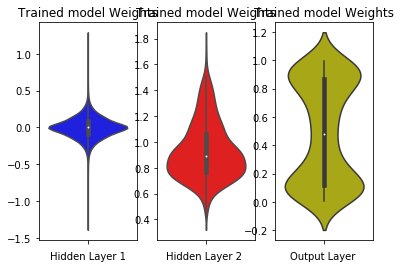

In [44]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

## with BN

In [45]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(120, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_5 (Batch (None, 364)               1456      
_________________________________________________________________
dense_45 (Dense)             (None, 120)               43800     
_________________________________________________________________
batch_normalization_6 (Batch (None, 120)               480       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1210      
Total params: 332,686
Trainable params: 331,718
Non-trainable params: 968
_________________________________________________________________


In [46]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.3009 - acc: 0.9105 - val_loss: 0.2050 - val_acc: 0.9410
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.1687 - acc: 0.9497 - val_loss: 0.1688 - val_acc: 0.9484
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1279 - acc: 0.9620 - val_loss: 0.1419 - val_acc: 0.9586
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.1018 - acc: 0.9699 - val_loss: 0.1334 - val_acc: 0.9604
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0841 - acc: 0.9744 - val_loss: 0.1205 - val_acc: 0.9618
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0683 - acc: 0.9793 - val_loss: 0.1188 - val_acc: 0.9643
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0580 - acc: 0.9826 - val_loss: 0.1038 - val_acc

Test score: 0.10334550192553142
Test accuracy: 0.9739


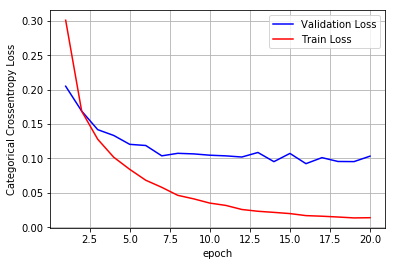

In [47]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

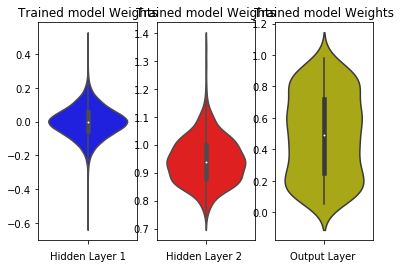

In [48]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

#### with dropout

In [49]:
model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.6))

model_drop.add(Dense(120, activation='relu') )
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 120)               43800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1210      
Total params: 330,750
Trainable params: 330,750
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.5312 - acc: 0.8343 - val_loss: 0.1783 - val_acc: 0.9467
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2596 - acc: 0.9250 - val_loss: 0.1274 - val_acc: 0.9624
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2061 - acc: 0.9402 - val_loss: 0.1078 - val_acc: 0.9673
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1773 - acc: 0.9481 - val_loss: 0.0959 - val_acc: 0.9709
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1572 - acc: 0.9541 - val_loss: 0.0878 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1478 - acc: 0.9561 - val_loss: 0.0815 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1323 - acc: 0.9608 - val_loss: 0.0841 - val_acc

Test score: 0.06933717019923351
Test accuracy: 0.9821


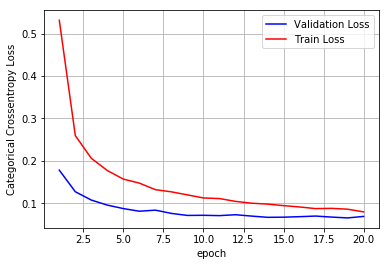

In [51]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

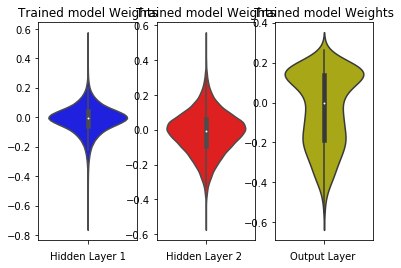

In [52]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### with 3 hidden layers

#### without BN and dropout

In [53]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu' ))
model_drop.add(Dense(256, activation='relu' ))

model_drop.add(Dense(120, activation='relu') )
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_51 (Dense)             (None, 364)               186732    
_________________________________________________________________
dense_52 (Dense)             (None, 256)               93440     
_________________________________________________________________
dense_53 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1210      
Total params: 714,142
Trainable params: 714,142
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.2245 - acc: 0.9330 - val_loss: 0.1041 - val_acc: 0.9676
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0871 - acc: 0.9724 - val_loss: 0.0801 - val_acc: 0.9752
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0568 - acc: 0.9822 - val_loss: 0.0861 - val_acc: 0.9745
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0445 - acc: 0.9861 - val_loss: 0.0675 - val_acc: 0.9800
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0338 - acc: 0.9893 - val_loss: 0.0838 - val_acc: 0.9755
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0291 - acc: 0.9909 - val_loss: 0.0797 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0931 - val_acc

Test score: 0.09207803813564228
Test accuracy: 0.981


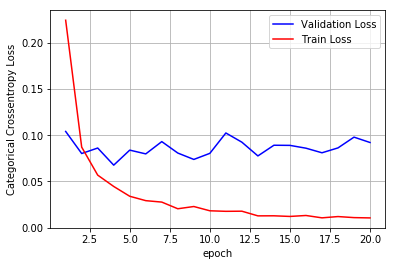

In [55]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

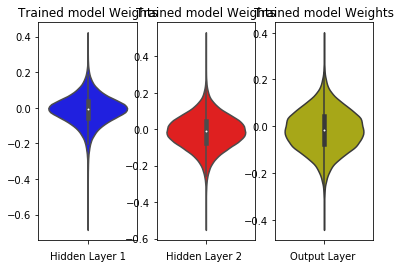

In [56]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### with BN

In [57]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu' ))
model_drop.add(BatchNormalization())
model_drop.add(Dense(256, activation='relu' ))
model_drop.add(BatchNormalization())
model_drop.add(Dense(120, activation='relu') )
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
dense_56 (Dense)             (None, 364)               186732    
_________________________________________________________________
batch_normalization_8 (Batch (None, 364)               1456      
_________________________________________________________________
dense_57 (Dense)             (None, 256)               93440     
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_58 (Dense)             (None, 120)               30840     
__________

In [58]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1826 - acc: 0.9441 - val_loss: 0.1125 - val_acc: 0.9650
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0788 - acc: 0.9750 - val_loss: 0.0934 - val_acc: 0.9711
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0561 - acc: 0.9817 - val_loss: 0.0923 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0440 - acc: 0.9857 - val_loss: 0.0746 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0343 - acc: 0.9886 - val_loss: 0.0833 - val_acc: 0.9765
Epoch 6/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0324 - acc: 0.9894 - val_loss: 0.0898 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0766 -

Test score: 0.07902181464087116
Test accuracy: 0.9798


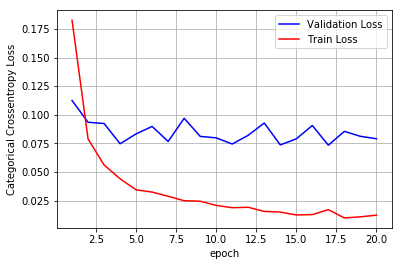

In [59]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

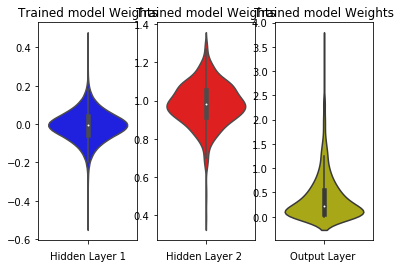

In [60]:

w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### with Dropout

In [61]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu' ))
model_drop.add(Dropout(0.43))

model_drop.add(Dense(256, activation='relu' ))
model_drop.add(Dropout(0.58))

model_drop.add(Dense(120, activation='relu') )
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.7))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 364)               186732    
_________________________________________________________________
dropout_6 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 256)               93440     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 120)               30840     
__________

In [62]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.8601 - acc: 0.7157 - val_loss: 0.2117 - val_acc: 0.9442
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3222 - acc: 0.9210 - val_loss: 0.1596 - val_acc: 0.9598
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2466 - acc: 0.9403 - val_loss: 0.1209 - val_acc: 0.9680
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2093 - acc: 0.9499 - val_loss: 0.1102 - val_acc: 0.9696
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1937 - acc: 0.9532 - val_loss: 0.1091 - val_acc: 0.9717
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1734 - acc: 0.9578 - val_loss: 0.1044 - val_acc: 0.9740
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1564 - acc: 0.9629 - val_loss: 0.0990 - val_ac

Test score: 0.08024117468356799
Test accuracy: 0.9822


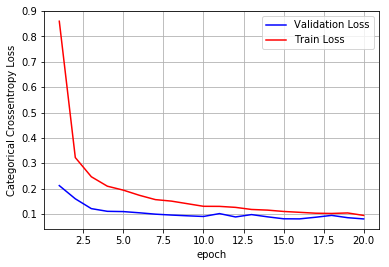

In [63]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

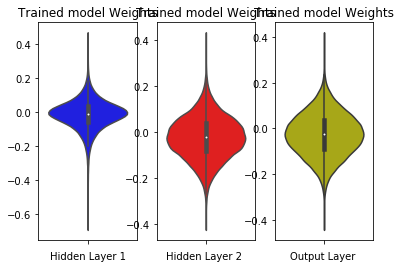

In [64]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

#### with 5 hidden layer

In [65]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(428, activation='relu' ))
model_drop.add(Dense(364, activation='relu' ))
model_drop.add(Dense(256, activation='relu') )
model_drop.add(Dense(128, activation='relu') )
model_drop.add(Dense(52, activation='relu') )
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_66 (Dense)             (None, 428)               219564    
_________________________________________________________________
dense_67 (Dense)             (None, 364)               156156    
_________________________________________________________________
dense_68 (Dense)             (None, 256)               93440     
_________________________________________________________________
dense_69 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_70 (Dense)             (None, 52)                6708      
_________________________________________________________________
dense_71 (Dense)             (None, 10)                530       
Total para

In [66]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.2497 - acc: 0.9249 - val_loss: 0.1158 - val_acc: 0.9647
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0938 - acc: 0.9710 - val_loss: 0.0992 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0696 - acc: 0.9792 - val_loss: 0.0833 - val_acc: 0.9740
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0545 - acc: 0.9831 - val_loss: 0.0824 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0429 - acc: 0.9871 - val_loss: 0.0772 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0388 - acc: 0.9885 - val_loss: 0.0912 - val_acc: 0.9761
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0271 - acc: 0.9919 - val_loss: 0.0712 - val_ac

Test score: 0.09593847599929904
Test accuracy: 0.9811


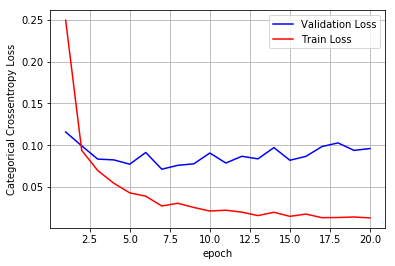

In [67]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

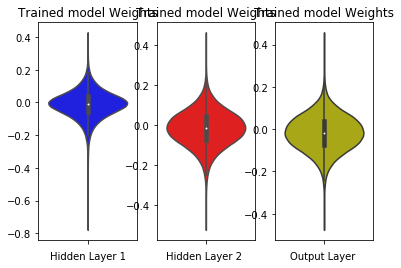

In [68]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### with BN

In [69]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(428, activation='relu' ))
model_drop.add(BatchNormalization())
model_drop.add(Dense(364, activation='relu' ))
model_drop.add(BatchNormalization())
model_drop.add(Dense(256, activation='relu') )
model_drop.add(BatchNormalization())
model_drop.add(Dense(128, activation='relu') )
model_drop.add(BatchNormalization())
model_drop.add(Dense(52, activation='relu') )
model_drop.add(BatchNormalization())
# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_73 (Dense)             (None, 428)               219564    
_________________________________________________________________
batch_normalization_12 (Batc (None, 428)               1712      
_________________________________________________________________
dense_74 (Dense)             (None, 364)               156156    
_________________________________________________________________
batch_normalization_13 (Batc (None, 364)               1456      
_________________________________________________________________
dense_75 (Dense)             (None, 256)               93440     
__________

In [70]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.2151 - acc: 0.9365 - val_loss: 0.1170 - val_acc: 0.9654
Epoch 2/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0951 - acc: 0.9716 - val_loss: 0.1045 - val_acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0709 - acc: 0.9780 - val_loss: 0.1024 - val_acc: 0.9688
Epoch 4/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0600 - acc: 0.9806 - val_loss: 0.0872 - val_acc: 0.9756
Epoch 5/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0482 - acc: 0.9853 - val_loss: 0.0875 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0450 - acc: 0.9859 - val_loss: 0.0719 - val_acc: 0.9789
Epoch 7/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0368 - acc: 0.9882 - val_loss: 0.

Test score: 0.07951451532564824
Test accuracy: 0.9801


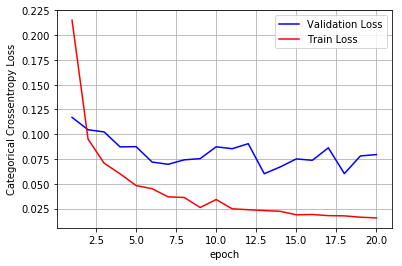

In [71]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

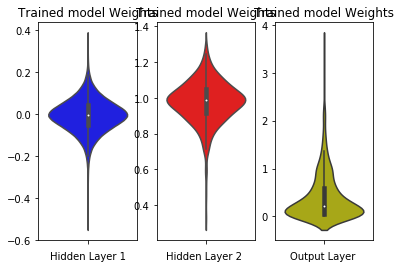

In [72]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

### With dropout

In [73]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
# model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.4))

model_drop.add(Dense(428, activation='relu' , kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu' , kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model_drop.add(Dropout(0.7))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.6))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.3))

# model_drop.add(BatchNormalization())
# model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 428)               219564    
_________________________________________________________________
dropout_10 (Dropout)         (None, 428)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 364)               156156    
_________________________________________________________________
dropout_11 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 256)               93440     
__________

In [74]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 14.4431 - acc: 0.1039 - val_loss: 13.9996 - val_acc: 0.1314
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 14.4611 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 14.4920 - acc: 0.1009 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 4/20
60000/60000 [==============================] - 5s 84us/step - loss: 14.5162 - acc: 0.0994 - val_loss: 14.6804 - val_acc: 0.0892
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 14.4631 - acc: 0.1027 - val_loss: 14.4547 - val_acc: 0.1032
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 14.4511 - acc: 0.1034 - val_loss: 13.8406 - val_acc: 0.1413
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 13

Test score: 14.288691453552246
Test accuracy: 0.1135


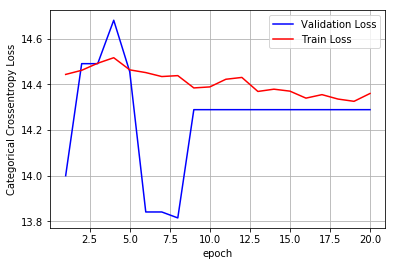

In [75]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show();

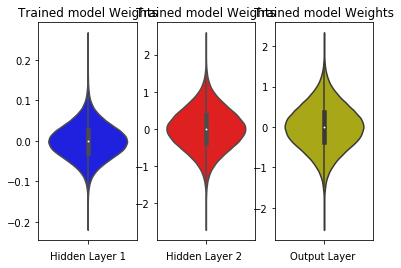

In [76]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show();

In [77]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["hidden layers", "Activation", "BN/DropOut", " Accuracy" ]

x.add_row([2 ,"relu", "no ", 98.42] )
x.add_row(["2" ,"sigmoid", "BN", 97.31 ])
x.add_row(["2" ,"relu", "DropOut", 98.12 ])

x.add_row(["3" ,"relu", " ", 97.97 ])
x.add_row(["3" ,"relu", "BN", 97.81 ])
x.add_row(["3" ,"relu", "DropOut", 98.38 ])

x.add_row(["5" ,"relu", " ", 97.89 ])
x.add_row(["5" ,"relu", "BN", 98.19 ])
x.add_row(["5" ,"relu", "DropOut", 9.58 ])

print(x)

+---------------+------------+------------+-----------+
| hidden layers | Activation | BN/DropOut |  Accuracy |
+---------------+------------+------------+-----------+
|       2       |    relu    |    no      |   98.42   |
|       2       |  sigmoid   |     BN     |   97.31   |
|       2       |    relu    |  DropOut   |   98.12   |
|       3       |    relu    |            |   97.97   |
|       3       |    relu    |     BN     |   97.81   |
|       3       |    relu    |  DropOut   |   98.38   |
|       5       |    relu    |            |   97.89   |
|       5       |    relu    |     BN     |   98.19   |
|       5       |    relu    |  DropOut   |    9.58   |
+---------------+------------+------------+-----------+
